<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_3_over_under.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from sklearn.model_selection import train_test_split

import numpy  as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [60]:
def function(X):
  return X * X + 5.

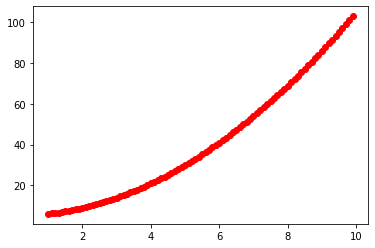

In [94]:
data_step = .1
X = np.reshape(np.arange(1,10, data_step), (-1, 1))
y = function(X)
inputs = X.shape[1]
plt.plot(X, y, 'o', color='red')

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
X_train[:2], y_train[:2]
num_train

72

In [89]:
neurons = 20
torch.set_default_dtype(torch.float64)
net = nn.Sequential(
    nn.Linear(inputs, neurons, bias = True), nn.ReLU(),    
    nn.Linear(neurons, neurons, bias = True), nn.Sigmoid(),
    nn.Linear(neurons, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .01)

In [90]:
num_epochs = 1000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1, 1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1, 1)
x_test_t = torch.from_numpy(X_test).clone()
history = []

In [91]:
for i in range(num_epochs):
    y_pred = net(x_train_t)
    loss = loss_fn(y_train_t,y_pred)
    history.append(loss.data)    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  
    test_loss = loss_fn(y_test_t,net(x_test_t))  
    if i > 0 and i % 100 == 0:
        print(f'Epoch {i}, loss = {loss:.3f}, test loss {test_loss:.3f}')

Epoch 100, loss = 1553.457, test loss 1026.763
Epoch 200, loss = 867.553, test loss 553.794
Epoch 300, loss = 504.587, test loss 326.067
Epoch 400, loss = 304.647, test loss 205.740
Epoch 500, loss = 189.167, test loss 137.230
Epoch 600, loss = 120.196, test loss 95.958
Epoch 700, loss = 78.507, test loss 68.833
Epoch 800, loss = 52.620, test loss 50.392
Epoch 900, loss = 35.970, test loss 37.792


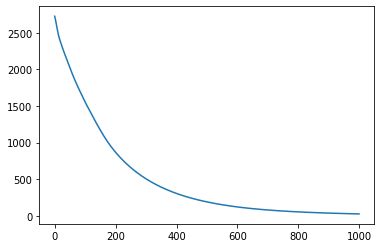

In [92]:
plt.plot(history)

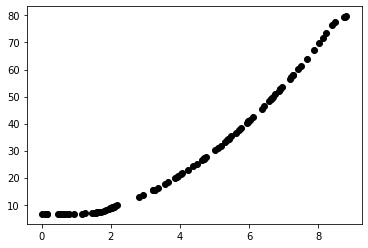

In [93]:
X_a = torch.rand(100,1).clone() * 9
y_a = net(X_a)
y_a = y_a.detach().numpy()
plt.plot(X_a, y_a, 'o', color='black')